# <font color=red>Лекция 4.2</font> <font color=blue>Библиотека Pil/Pillow</font>

Библиотека изображений Python, или PIL (Python Imaging Library) нужна для обработки графики в Python. Фредрик Лунд является автором одного из лучших блогов, посвященных Python. Однако он перестал обновляться в далеком 2009 году, незадолго до последнего релиза PIL. К счастью, нашлись разработчики Python, что подхватили проект, создав форк PIL под названием Pillow. Pillow стал заменой оригинальной библиотеки PIL. Он также поддерживает Python 3, чего PIL так и не достиг.

Обратите внимание на то, что PIL и Pillow не могут быть установлены одновременно. В документации есть определенные предупреждения, где перечисляются различия между PIL и Pillow. Они обновляются время от времени, поэтому лучше ознакомиться с последними изменениями на [официальной странице](https://pillow.readthedocs.io/en/stable/index.html).

**Картинка для испытаний (test19.jpg), расположена в папке images):**

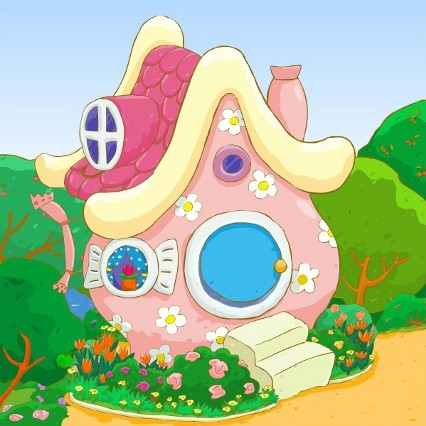

### <center>Подготовка</center>

In [ ]:
import random
from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 

mode = int(input('Режим: '))
image = Image.open("images/temp19.jpg") #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину.
print ("Ширина: ", width,"px")
height = image.size[1] #Определяем высоту.
print ("Высота: ", height,"px")
pix = image.load() #Выгружаем значения пикселей.

In [ ]:
#Вывод изображения
image.show()


### <center>Оттенки серого</center>

Для получения этого преобразования необходимо «усреднить» каждый пиксел.

<center><font color="red"><b>Перед выполнением следующего кода выполните подготовку исходного изображения в режиме 0</b></font></center>

In [ ]:
if (mode == 0):
    for i in range(width):
        for j in range(height):
            a = pix[i, j][0]
            b = pix[i, j][1]
            c = pix[i, j][2]
            S = (a + b + c) // 3
            draw.point((i, j), (S, S, S))

**Откройте полученное изображение и сравните с результатом:**

In [ ]:
image.show()

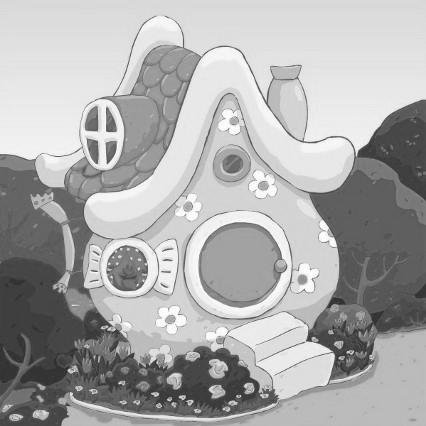

### <center>Сепия</center>
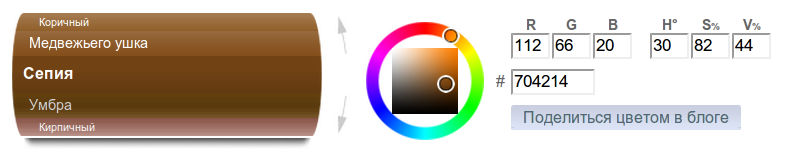
Чтобы получить сепию, нужно посчитать среднее значение и взять какой — нибудь коэффициент.
middle = (R + G + B) / 3

Первое значение пиксела ( R ) = middle + 2 * k

Второе значение пиксела ( G ) = middle + k

Третье значение пиксела ( B ) = middle

<center><font color="red"><b>Перед выполнением следующего кода повторно выполните подготовку исходного изображения в режиме 1</b></font></center>

In [ ]:
if (mode == 1):
    depth = int(input('depth:'))
    for i in range(width):
        for j in range(height):
            a = pix[i, j][0]
            b = pix[i, j][1]
            c = pix[i, j][2]
            S = (a + b + c) // 3
            a = S + depth * 2
            b = S + depth
            c = S
            if (a > 255):
                a = 255
            if (b > 255):
                b = 255
            if (c > 255):
                c = 255
            draw.point((i, j), (a, b, c))

**Откройте полученное изображение и сравните с результатом:**

In [ ]:
image.show()

Подберите глубину преобразования для достижения результата.

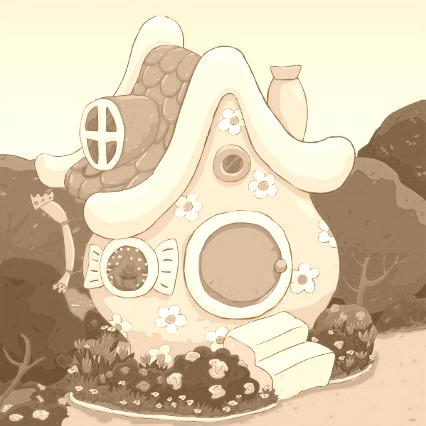

### <center>Негатив</center>

Теперь научимся получать негатив.
Достаточно лишь каждое значение пиксела вычесть из 255.

<center><font color="red"><b>Перед выполнением следующего кода повторно выполните подготовку исходного изображения в режиме 2</b></font></center>

In [ ]:
if (mode == 2):
    for i in range(width):
        for j in range(height):
            a = pix[i, j][0]
            b = pix[i, j][1]
            c = pix[i, j][2]
            draw.point((i, j), (255 - a, 255 - b, 255 - c))

**Откройте полученное изображение и сравните с результатом:**

In [ ]:
image.show()

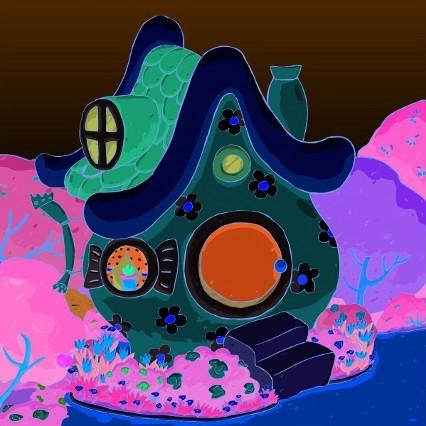

### <center>Добавление шумов</center>

Будем всегда добавлять к пикселу какое-нибудь рандомное значение. Чем больше разброс этих значений, тем больше шумов.

<center><font color="red"><b>Перед выполнением следующего кода повторно выполните подготовку исходного изображения в режиме 3</b></font></center>

In [ ]:
if (mode == 3):
	factor = int(input('factor:'))
	for i in range(width):
		for j in range(height):
			rand = random.randint(-factor, factor)
			a = pix[i, j][0] + rand
			b = pix[i, j][1] + rand
			c = pix[i, j][2] + rand
			if (a < 0):
				a = 0
			if (b < 0):
				b = 0
			if (c < 0):
				c = 0
			if (a > 255):
				a = 255
			if (b > 255):
				b = 255
			if (c > 255):
				c = 255
			draw.point((i, j), (a, b, c))

**Откройте полученное изображение и сравните с результатом:**

In [ ]:
image.show()

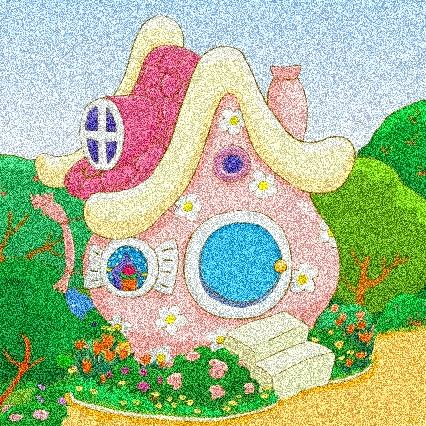

factor = 70

### <center>Яркость</center>
Для регулирования яркости к каждому пикселу мы будем добавлять определенное значение. Если оно > 0, то картинка становится ярче, иначе темнее.

<center><font color="red"><b>Перед выполнением следующего кода повторно выполните подготовку исходного изображения в режиме 4</b></font></center>

In [ ]:
if (mode == 4):
	factor = int(input('factor:'))
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0] + factor
			b = pix[i, j][1] + factor
			c = pix[i, j][2] + factor
			if (a < 0):
				a = 0
			if (b < 0):
				b = 0
			if (c < 0):
				c = 0
			if (a > 255):
				a = 255
			if (b > 255):
				b = 255
			if (c > 255):
				c = 255
			draw.point((i, j), (a, b, c))

**Откройте полученные изображения (при факторах 100 и -100) и сравните с результами:**

In [ ]:
image.show()

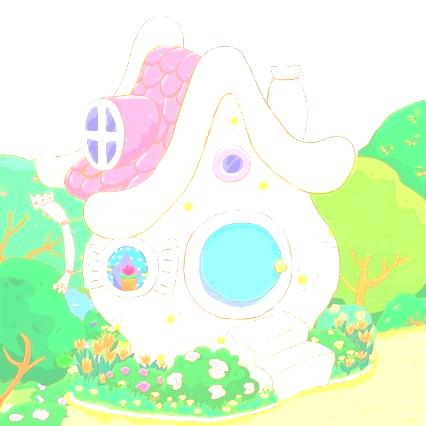
Фактор: 100
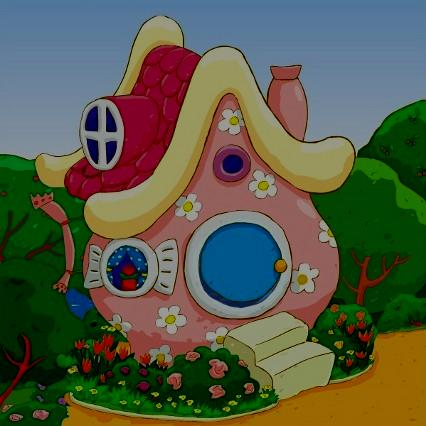
Фактор: -100

### <center>Чёрно-белое изображение</center>
Теперь все пикселы надо разбить на 2 группы: черные и белые.
Для проверки принадлежности к определенной группе мы будем смотреть к чему ближе значение пиксела: к белому цвету или к чёрному.

<center><font color="red"><b>Перед выполнением следующего кода повторно выполните подготовку исходного изображения в режиме 5</b></font></center>

In [ ]:
if (mode == 5):
	factor = int(input('factor:'))
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			S = a + b + c
			if (S > (((255 + factor) // 2) * 3)):
				a, b, c = 255, 255, 255
			else:
				a, b, c = 0, 0, 0
			draw.point((i, j), (a, b, c))

**Откройте полученное изображение и сравните с результатом:**

In [ ]:
image.show()

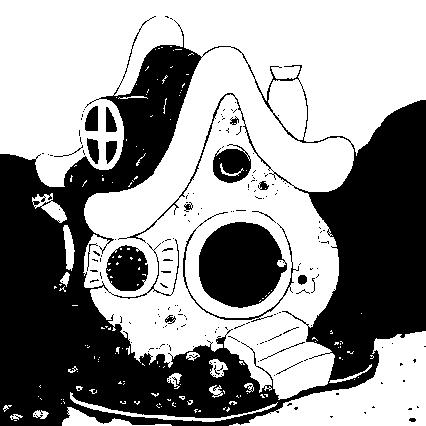
factor: 100

### <center>Заключение</center>
Сохраняем результат последнего преобразования и удаляем кисть.

In [ ]:
image.save("images/ans19.jpg", "JPEG")
del draw